In [ ]:
#비지도 학습

# K-means : K 평균

In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [3]:
data <- read.csv("./Data/kmeans.csv",row.names = 'X')
head(data)

,식당맛집점수,식당청결점수
,<int>,<int>
강릉찌개,90,93
수원갈비,55,70
한라식당,36,20
김천국밥,46,60
양양햄버거,65,35
제주식당,85,90


### K-means
k-means 는 표준화를 시도하여야하나 현재 데이터는 점수이므로 표준화를 안한다

In [4]:
k_means <- kmeans(data,centers = 3, iter.max = 10000)
k_means

K-means clustering with 3 clusters of sizes 2, 2, 2

Cluster means:
  식당맛집점수 식당청결점수
1         50.5         65.0
2         87.5         91.5
3         50.5         27.5

Clustering vector:
  강릉찌개   수원갈비   한라식당   김천국밥 양양햄버거   제주식당 
         2          1          3          1          3          2 

Within cluster sum of squares by cluster:
[1]  90.5  17.0 533.0
 (between_SS / total_SS =  90.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [5]:
k_means$cluster

강릉찌개   수원갈비   한라식당   김천국밥 양양햄버거   제주식당 
         2          1          3          1          3          2

In [7]:
data$k_group <- k_means$cluster
head(data)

,식당맛집점수,식당청결점수,k_group
,<int>,<int>,<int>
강릉찌개,90,93,2
수원갈비,55,70,1
한라식당,36,20,3
김천국밥,46,60,1
양양햄버거,65,35,3
제주식당,85,90,2


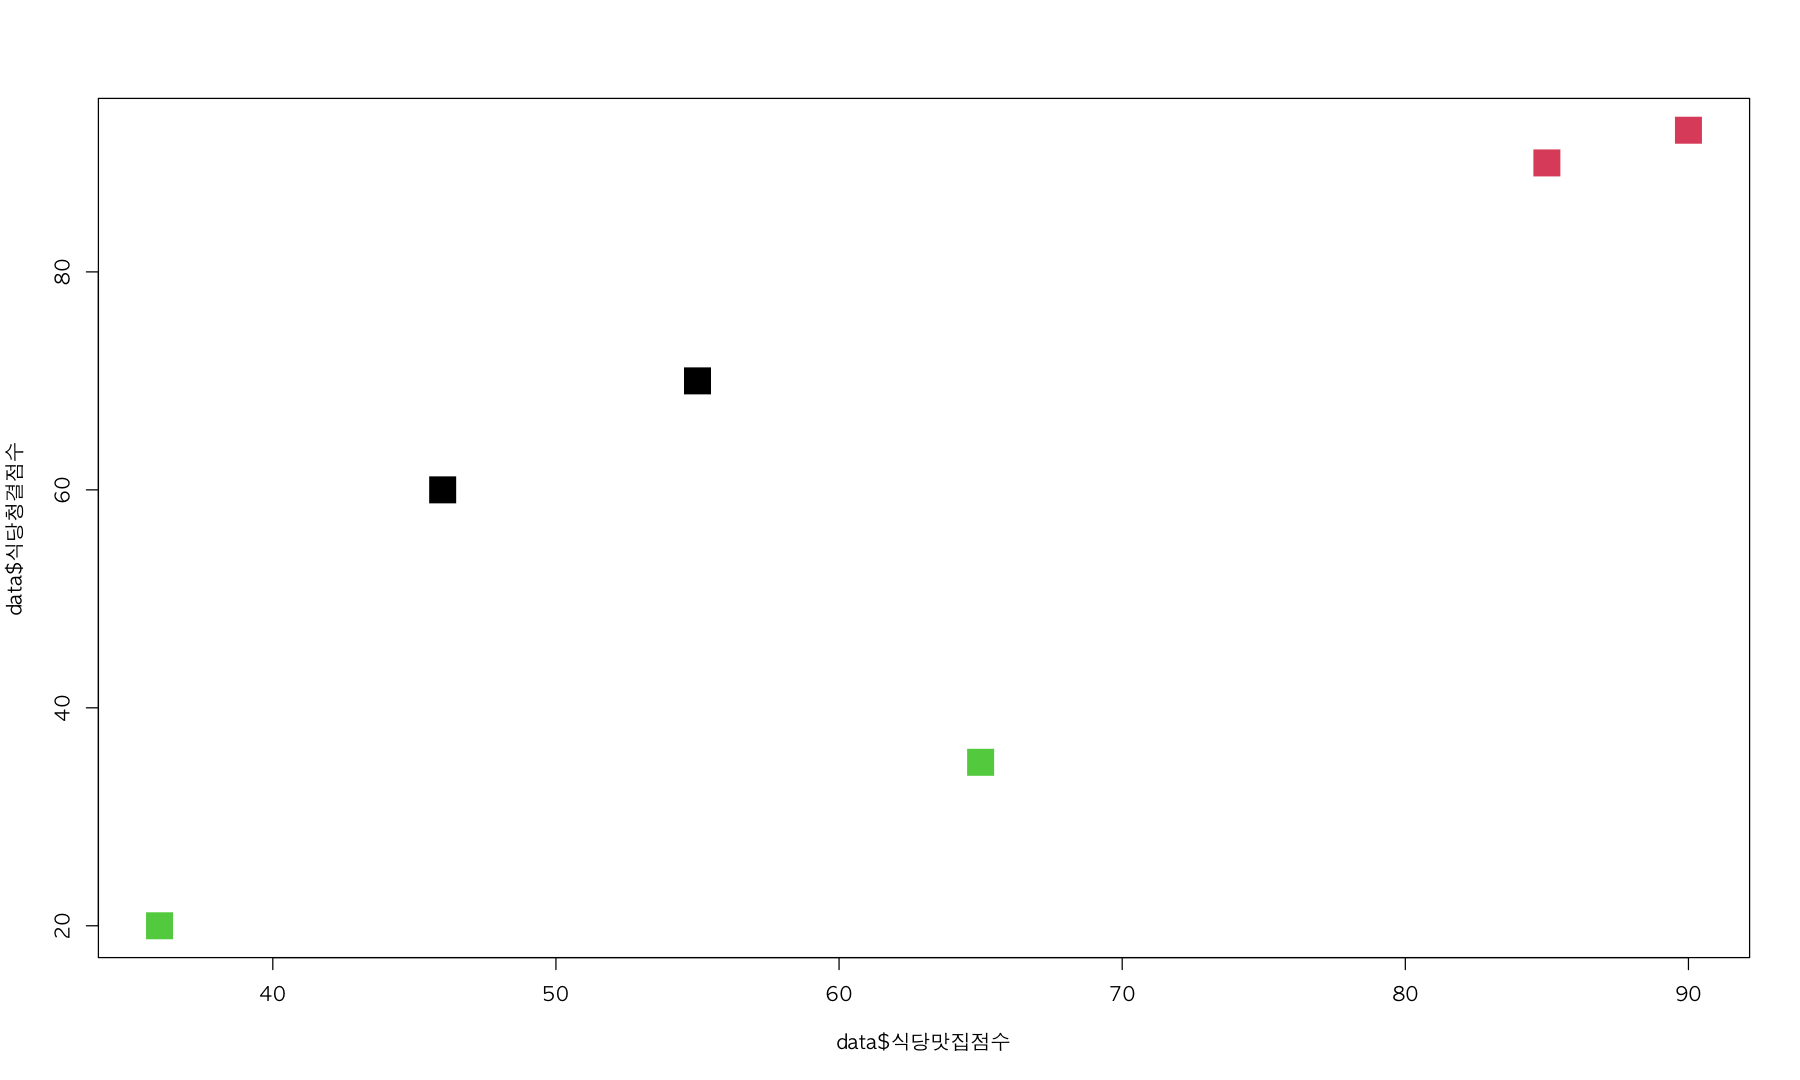

In [8]:
par(family = "AppleGothic", bg = 'white') 
plot(data$`식당맛집점수`,
     data$`식당청결점수`,
     col = data$k_group,
     cex = 3,
     pch = 15,
)

### k-means 에서 k 값을 결정하는 방법

In [9]:
data.k <- data[,-3]
data.k

,식당맛집점수,식당청결점수
,<int>,<int>
강릉찌개,90,93
수원갈비,55,70
한라식당,36,20
김천국밥,46,60
양양햄버거,65,35
제주식당,85,90


In [12]:
#install.packages("NbClust")
library(NbClust)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


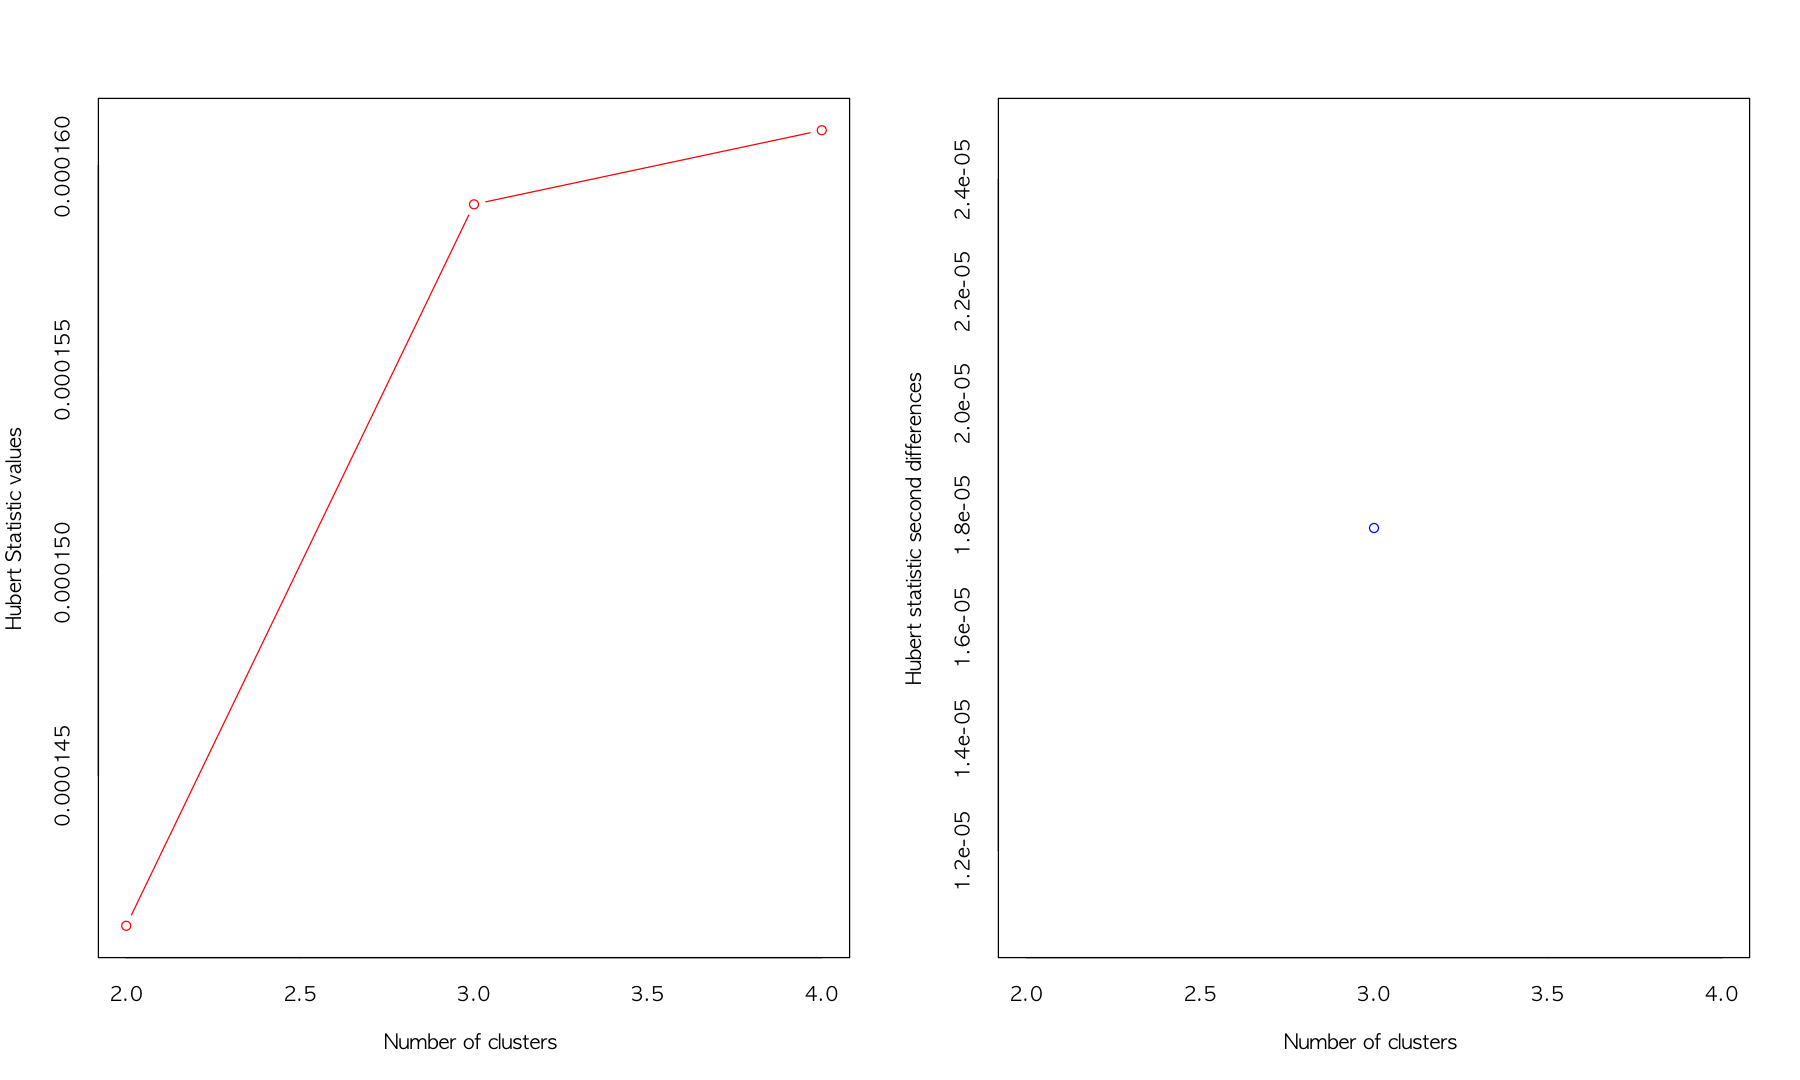

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 14 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


$All.index
      KL      CH Hartigan     CCC   Scott   Marriot    TrCovW  TraceW  Friedman
2 1.1550  8.9027   8.7822  2.8029 24.7726 2688135.5 869936.41 2046.75   77.5542
3 3.7939 13.9617   0.0818  1.9866 52.9119   55570.5  26010.62  640.50 2738.1195
4 0.2804  6.3926  11.7790 -0.3910 53.0776   96100.0  24701.12  623.50 2740.8077
    Rubin Cindex     DB Silhouette   Duda Pseudot2  Beale Ratkowsky     Ball
2 25.8268 0.5205 0.4353     0.5564 0.3072   4.5108 1.5036    0.5966 1023.375
3 82.5308 0.4281 0.4966     0.5624 1.0000   0.0000 0.0000    0.5403  213.500
4 84.7811 0.6967 0.4179     0.6007 5.9724  -0.8326 0.0000    0.4688  155.875
  Ptbiserial    Frey McClain   Dunn Hubert SDindex  Dindex   SDbw
2     0.6350  0.4848  0.5835 0.6741  1e-04  0.1320 15.4687 0.2554
3     0.6281 -0.6395  1.2931 0.9617  2e-04  0.0982  8.6557 0.1051
4     0.3952  0.1282  3.0040 0.1786  2e-04  0.4120  7.6839 0.4101

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2        -0.5522            -5.6219       0.3259
3        -1.0633             0.0000          NaN
4        -1.0633            -1.9405          NaN

$Best.nc
                    KL      CH Hartigan    CCC   Scott Marriot   TrCovW  TraceW
Number_clusters 3.0000  3.0000   4.0000 2.0000  3.0000       3      3.0    3.00
Value_Index     3.7939 13.9617  11.6972 2.8029 28.1393 2673094 843925.8 1389.25
                Friedman    Rubin Cindex     DB Silhouette   Duda PseudoT2
Number_clusters    3.000   3.0000 3.0000 4.0000     4.0000 2.0000        3
Value_Index     2660.565 -54.4538 0.4281 0.4179     0.6007 0.3072        0
                 Beale Ratkowsky    Ball PtBiserial Frey McClain   Dunn Hubert
Number_clusters 2.0000    2.0000   3.000      2.000    1  2.0000 3.0000      0
Value_Index     1.5036    0.5966 809.875      0.635   NA  0.5835 0.9617      0
                SDindex Dindex   SDbw
Number_clusters  3.0000      0 3.0000
Value_Index      0.0982      0 0.1051

$Best.partition
  강릉찌개   수원갈비   한라식당   김천국밥 양양햄버거   제주식당 
         1          2          3          2          3          1

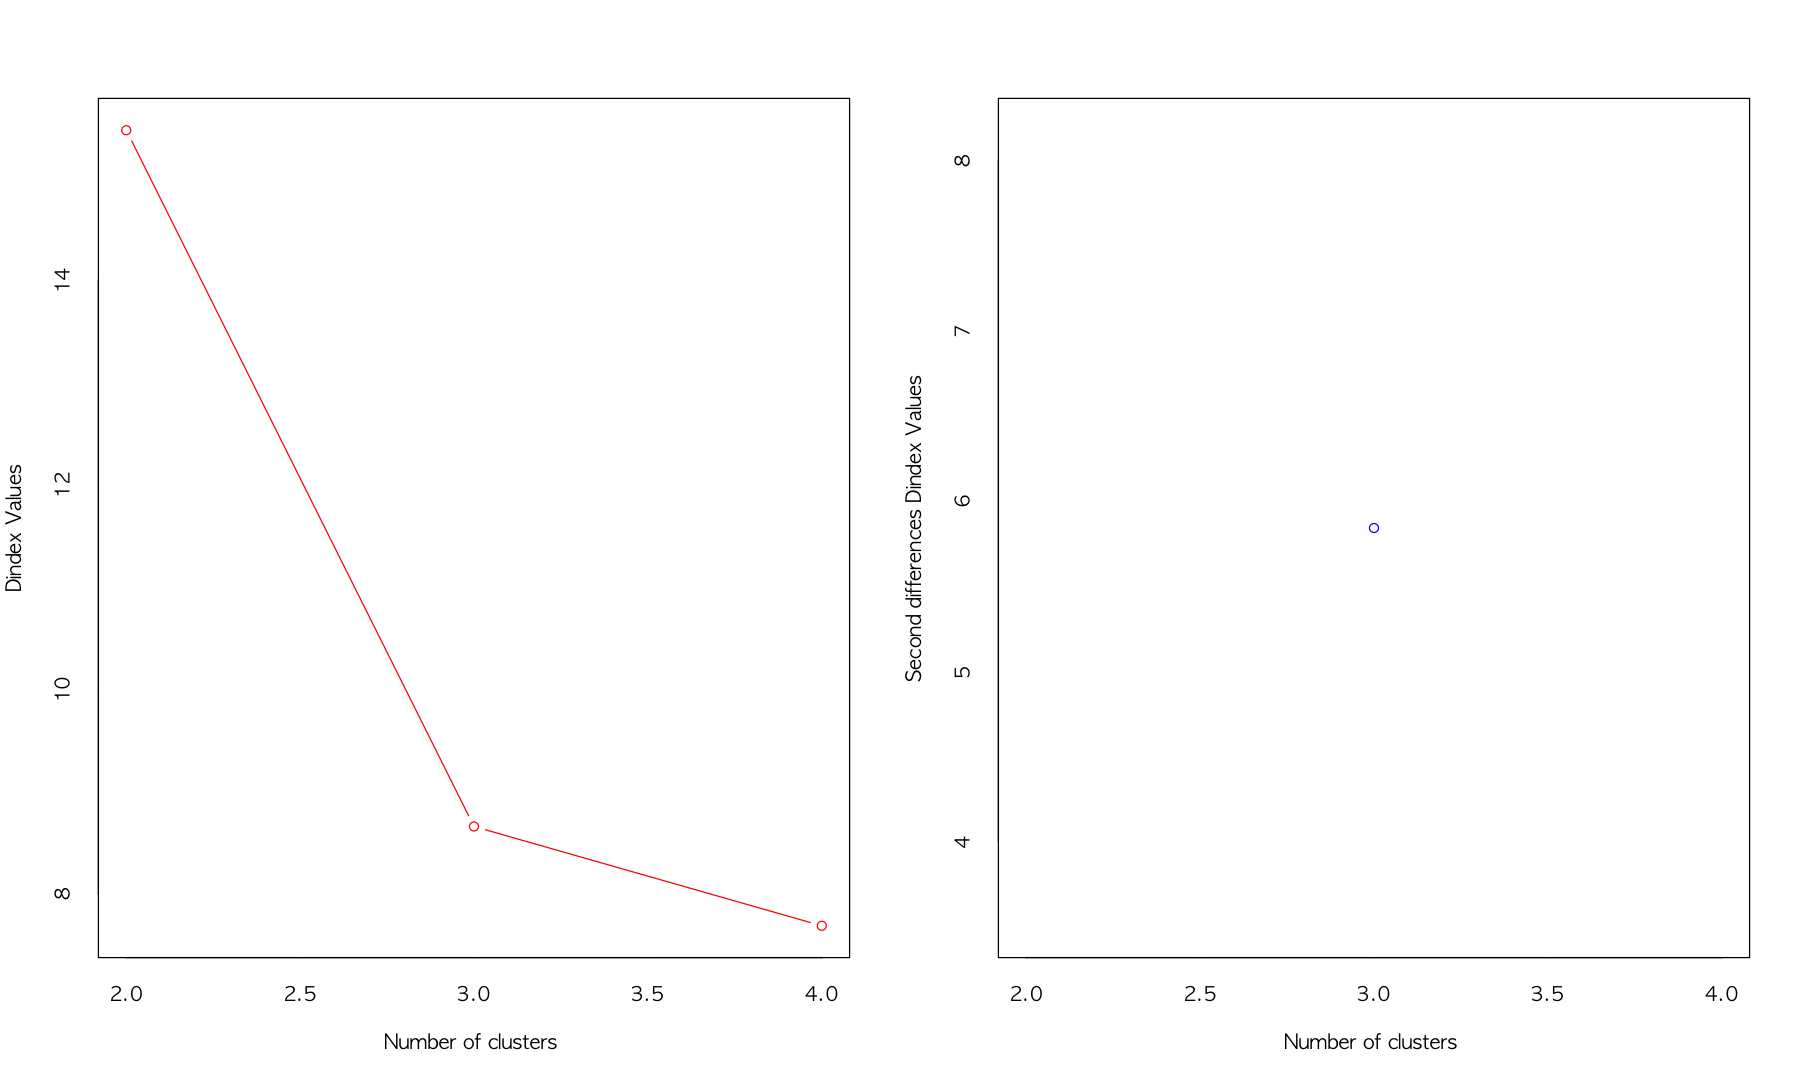

In [18]:
par(family = "AppleGothic", bg = 'white') 
nc <- NbClust(data.k, min.nc = 2, max.nc = 4, method = 'kmeans')
nc

In [ ]:
# 그래프가 꺾이는 부분이 K 값의 적절한 값


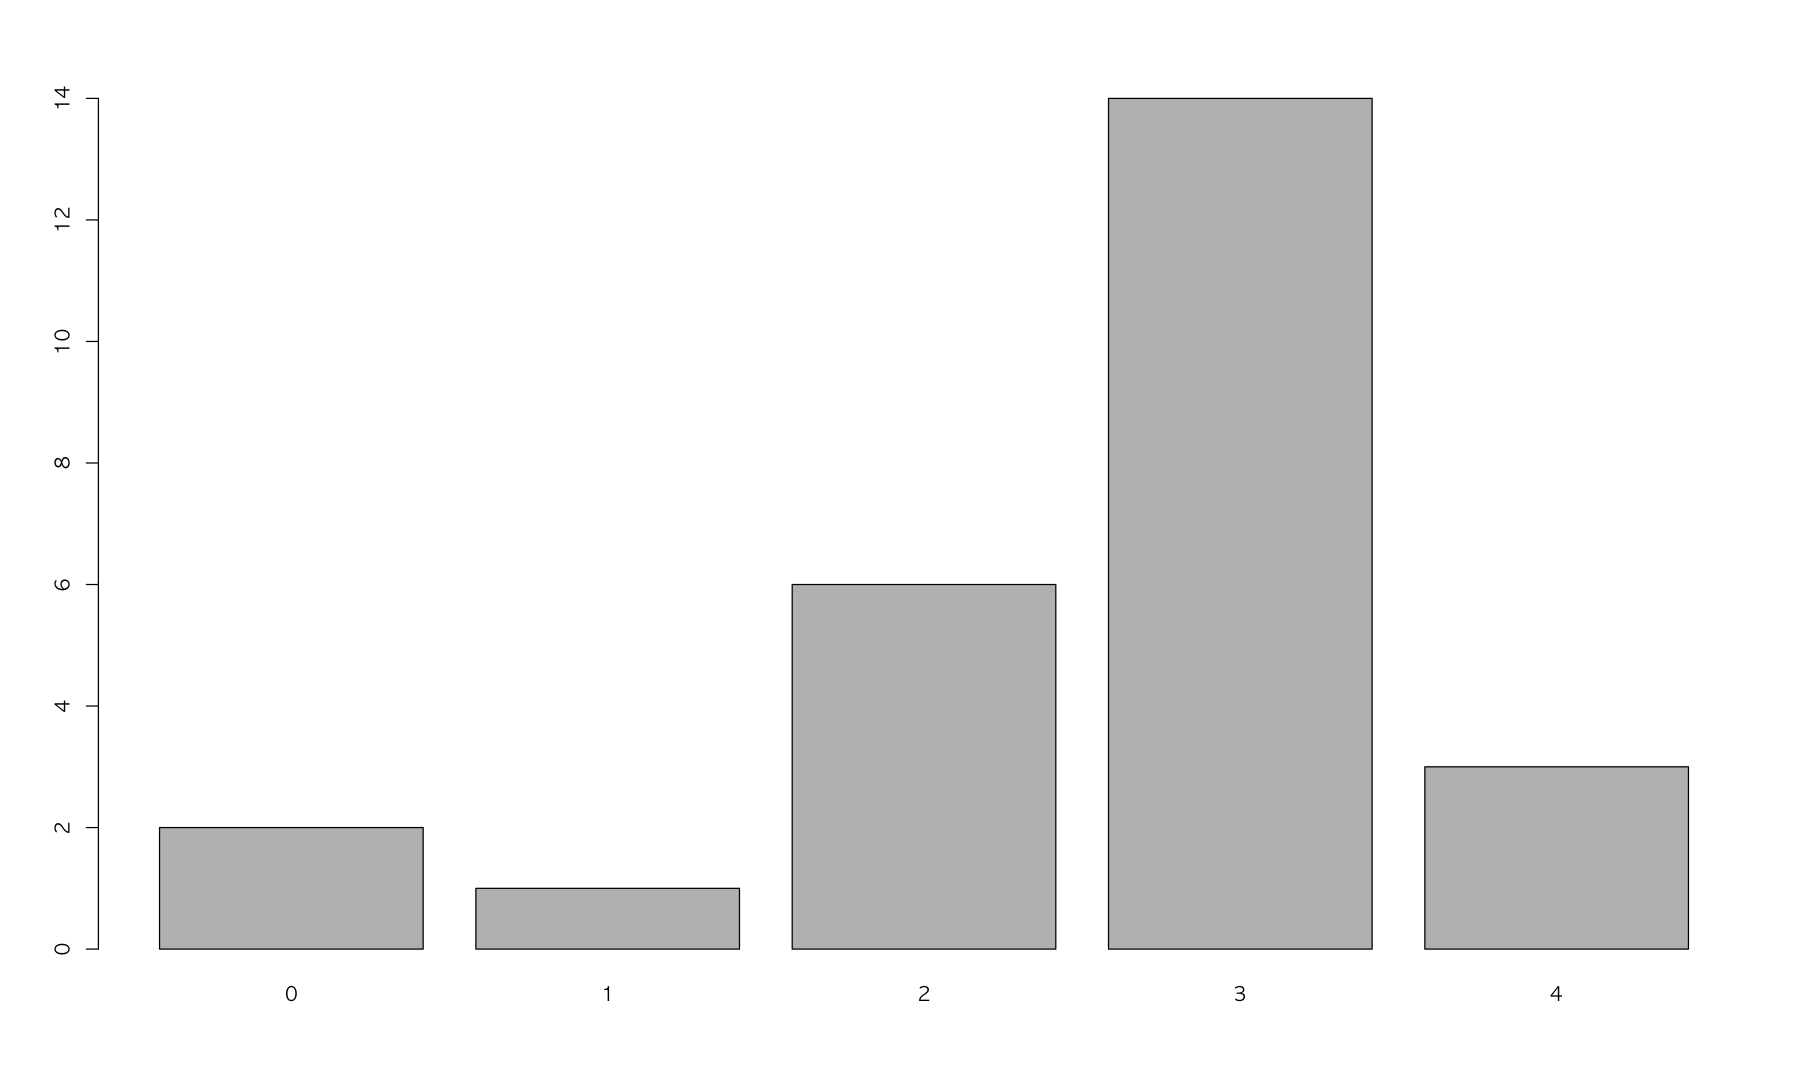

In [20]:
par(family = "AppleGothic", bg = 'white') 
barplot(table(nc$Best.nc[1,]))

In [25]:
head(iris)
idata <- iris[-5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


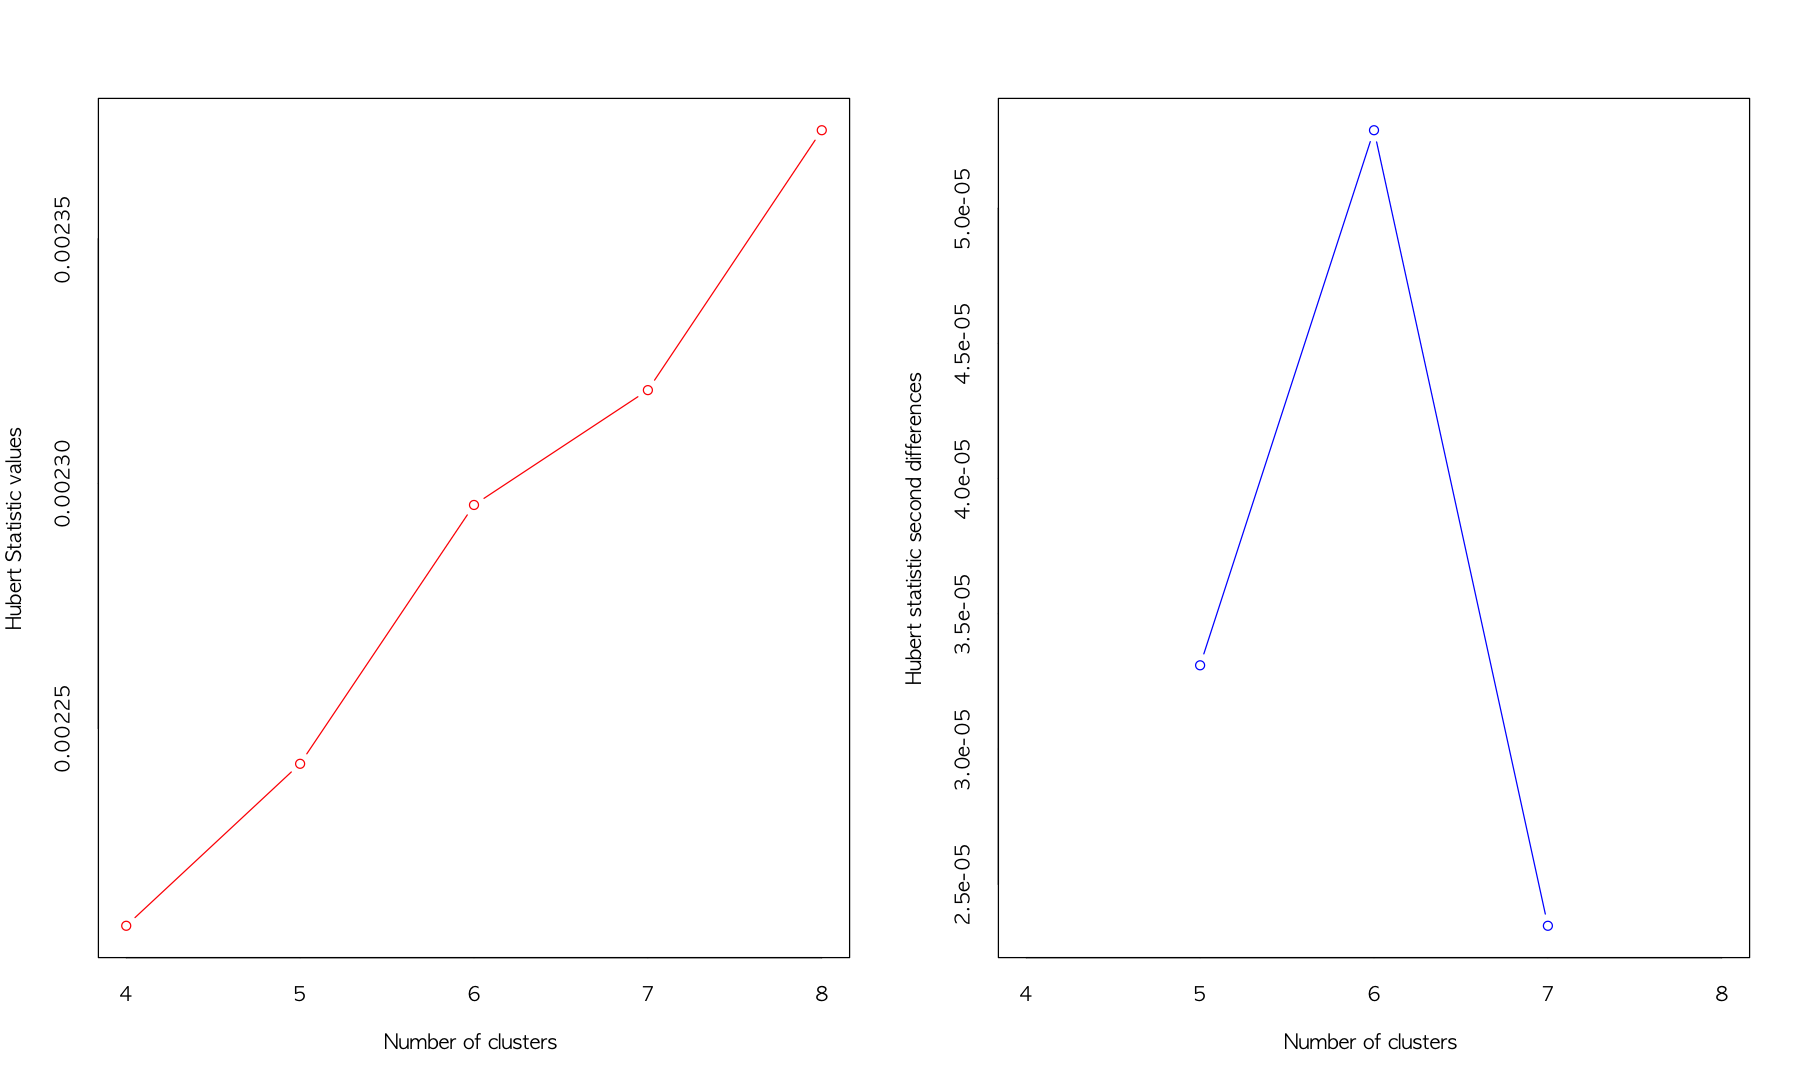

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 4 as the best number of clusters 
* 11 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 3 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


$All.index
      KL       CH Hartigan     CCC    Scott  Marriot   TrCovW  TraceW  Friedman
4 0.2006 415.4655  63.3643 33.4414 1296.511 348642.4 221.8632 71.4452  850.7642
5 4.2008 459.5058  25.2963 34.3409 1415.662 246163.9 140.6758 49.8223  936.2996
6 2.0868 433.7827   6.3415 33.3853 1505.840 194309.4  79.9311 42.4215 1070.5134
7 0.2423 375.8334  34.3200 31.4378 1523.492 235115.0  74.1212 40.6322 1086.0457
8 1.8336 401.5324  23.0039 32.0912 1607.479 175426.3  54.5852 32.7679 1298.5148
     Rubin Cindex     DB Silhouette   Duda Pseudot2   Beale Ratkowsky    Ball
4 133.5189 0.3485 0.9484     0.4152 0.5870  46.4403  1.6709    0.4440 17.8613
5 191.4664 0.3327 0.9987     0.3728 1.0842  -3.8046 -0.1814    0.4067  9.9645
6 224.8690 0.3596 1.0808     0.3357 1.0328  -1.1759 -0.0739    0.3733  7.0703
7 234.7718 0.3614 1.1374     0.2935 1.2705  -7.2384 -0.4949    0.3481  5.8046
8 291.1170 0.3830 1.1072     0.3121 0.6969  10.4369  1.0042    0.3301  4.0960
  Ptbiserial     Frey McClain   Dunn Hubert SDindex Dindex   SDbw
4     0.6250   1.0780  0.7275 0.0528 0.0022  3.0992 0.6055 0.2351
5     0.5521   1.3588  0.9903 0.0624 0.0022  3.1825 0.5148 0.1542
6     0.5034 -11.9269  1.2043 0.0739 0.0023  3.3461 0.4811 0.1149
7     0.4724   0.4676  1.3897 0.0739 0.0023  4.4801 0.4693 0.0903
8     0.4566   0.5934  1.4577 0.0869 0.0024  4.6264 0.4269 0.0716

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
4         0.5842            46.9673       0.1574
5         0.4837            52.3097       1.0000
6         0.4590            43.6093       1.0000
7         0.4590            40.0734       1.0000
8         0.4284            32.0211       0.4098

$Best.nc
                    KL       CH Hartigan     CCC    Scott  Marriot  TrCovW
Number_clusters 5.0000   5.0000    5.000  5.0000   5.0000     6.00  5.0000
Value_Index     4.2008 459.5058   38.068 34.3409 119.1505 92659.96 81.1874
                 TraceW Friedman    Rubin Cindex     DB Silhouette  Duda
Number_clusters  5.0000   8.0000   5.0000 5.0000 4.0000     4.0000 4.000
Value_Index     14.2222 212.4691 -24.5448 0.3327 0.9484     0.4152 0.587
                PseudoT2  Beale Ratkowsky   Ball PtBiserial   Frey McClain
Number_clusters   4.0000 4.0000     4.000 5.0000      4.000 5.0000  4.0000
Value_Index      46.4403 1.6709     0.444 7.8969      0.625 1.3588  0.7275
                  Dunn Hubert SDindex Dindex   SDbw
Number_clusters 8.0000      0  4.0000      0 8.0000
Value_Index     0.0869      0  3.0992      0 0.0716

$Best.partition
  [1] 3 4 4 4 3 3 4 3 4 4 3 4 4 4 3 3 3 3 3 3 3 3 4 3 4 4 3 3 3 4 4 3 3 3 4 4 3
 [38] 3 4 3 3 4 4 3 3 4 3 4 3 4 5 5 5 1 5 1 5 1 5 1 1 1 1 5 1 5 1 1 5 1 5 1 5 5
 [75] 5 5 5 5 5 1 1 1 1 5 1 5 5 5 1 1 1 5 1 1 1 1 1 5 1 1 2 5 2 2 2 2 1 2 2 2 5
[112] 5 2 5 5 2 2 2 2 5 2 5 2 5 2 2 5 5 2 2 2 2 2 5 5 2 2 2 5 2 2 2 5 2 2 2 5 5
[149] 2 5

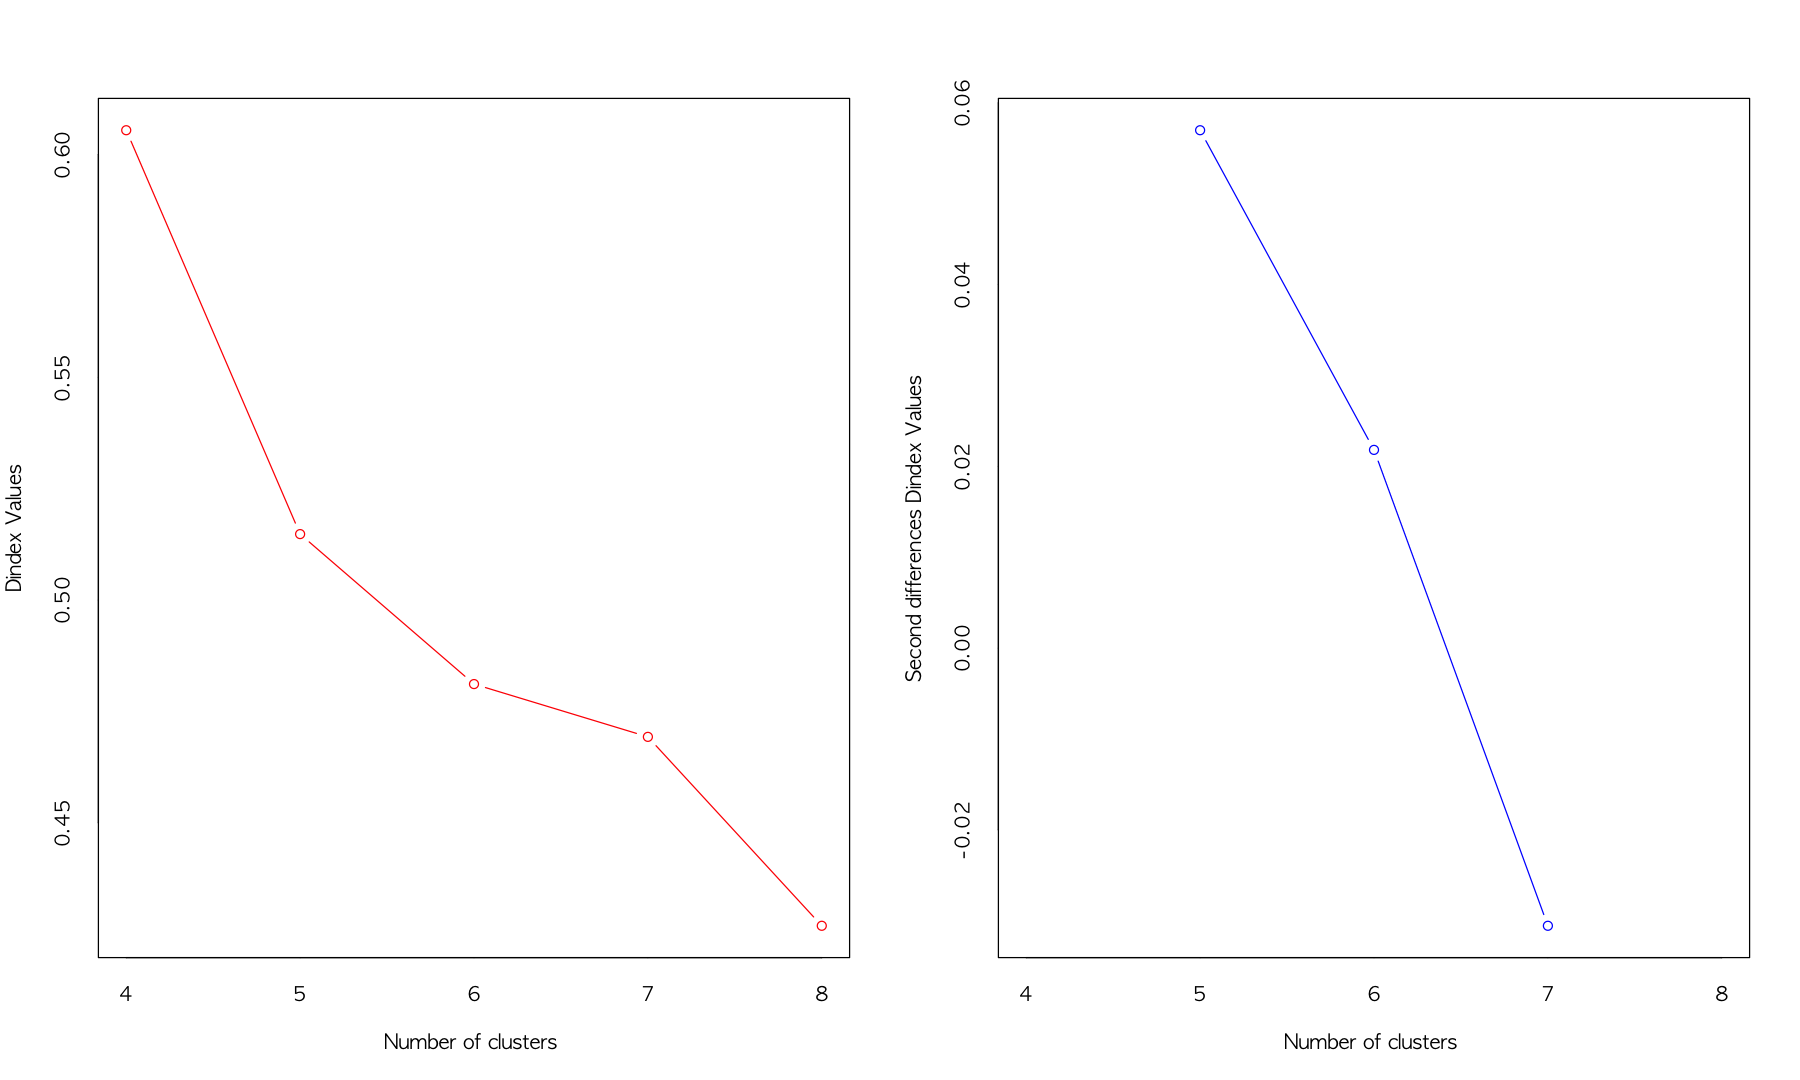

In [33]:
par(family = "AppleGothic", bg = 'white') 
NbClust(idata, min.nc = 4, max.nc = 8, method = 'kmeans')

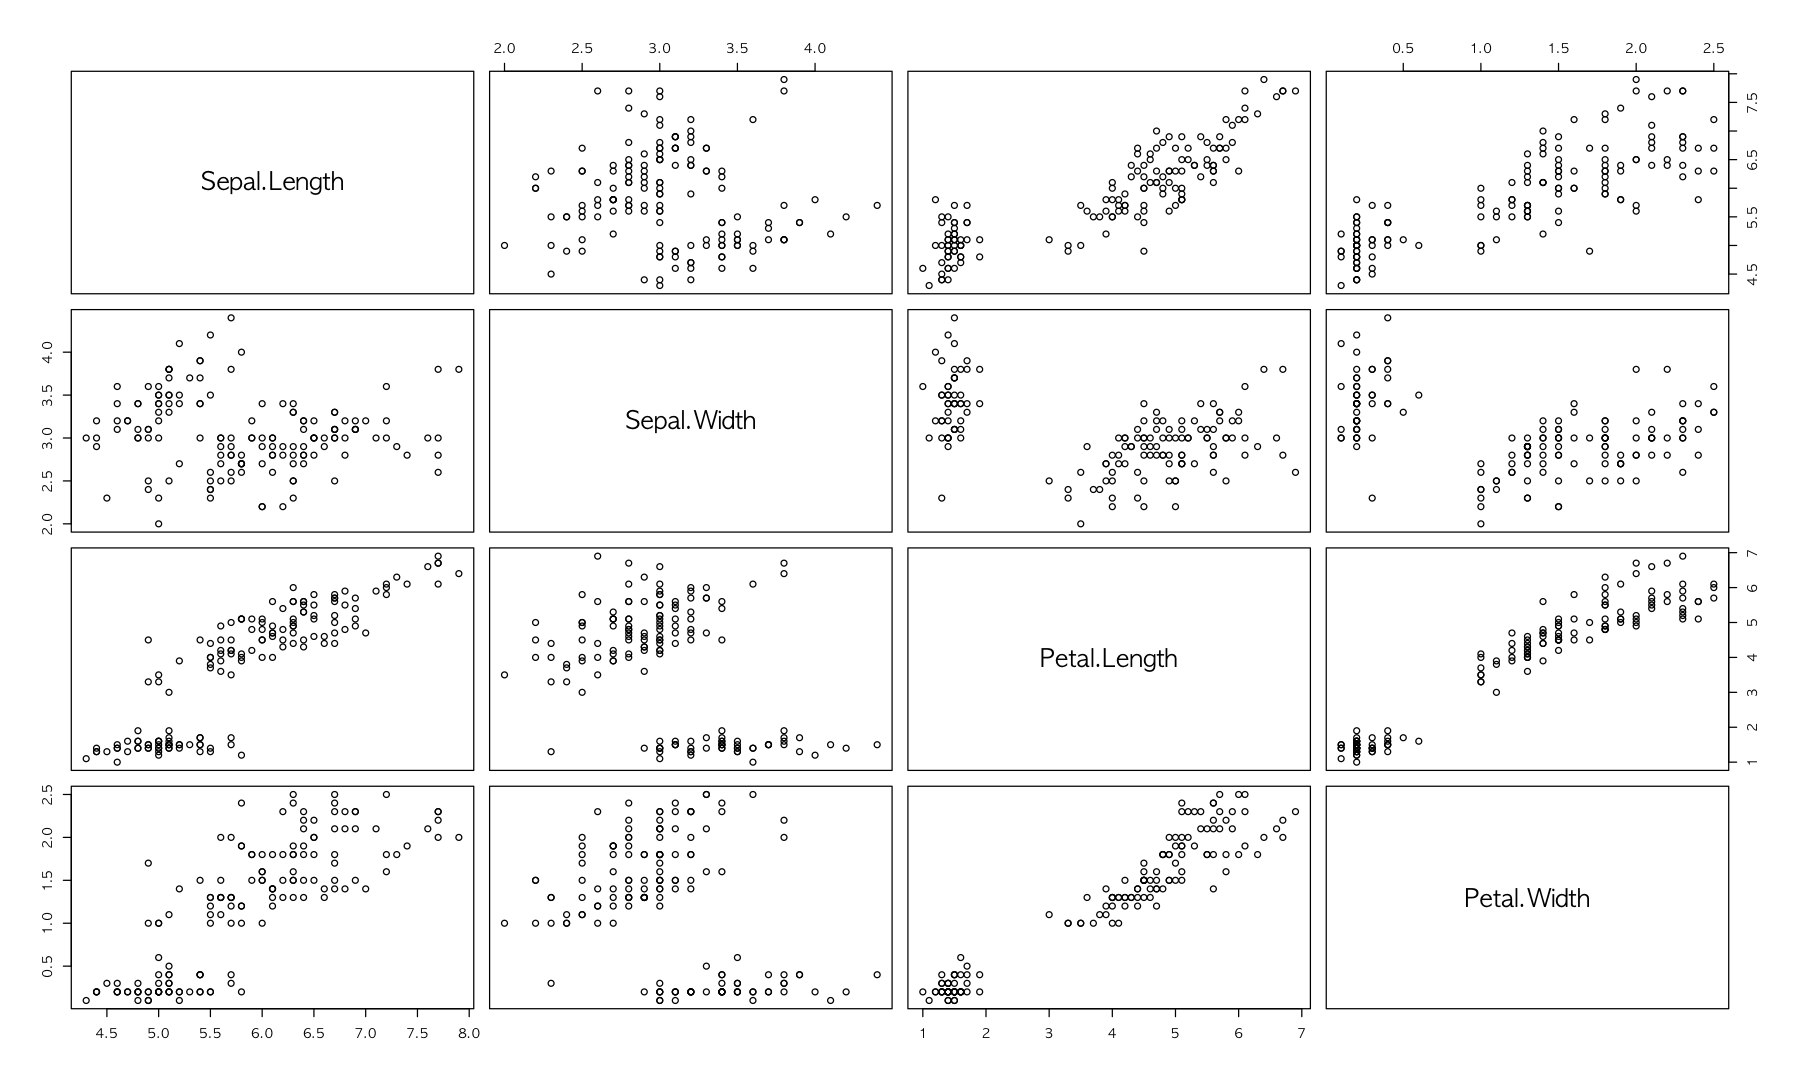

In [36]:
par(family = "AppleGothic", bg = 'white') 
plot(iris[-5])